In [1]:
# Import 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

import sys
sys.path.append('../')
from helpers import cm2inch, title, show_num_contours, load_datasets
from melodic_contour import *

In [2]:
dfs, contours = load_datasets()

In [3]:
erk_contours = [Contour(pitches) for pitches in contours['erk']]

# Types

In [4]:
adams_optimizer = TypologyOptimizer(AdamsTypology)
best, res = adams_optimizer.optimize(erk_contours[:1000], dict(tolerance=[0, 5]))
best['tolerance']

0.9456673111775862

In [5]:
A = AdamsTypology(tolerance=best['tolerance'])
adams_types = [A.classify(c) for c in erk_contours]

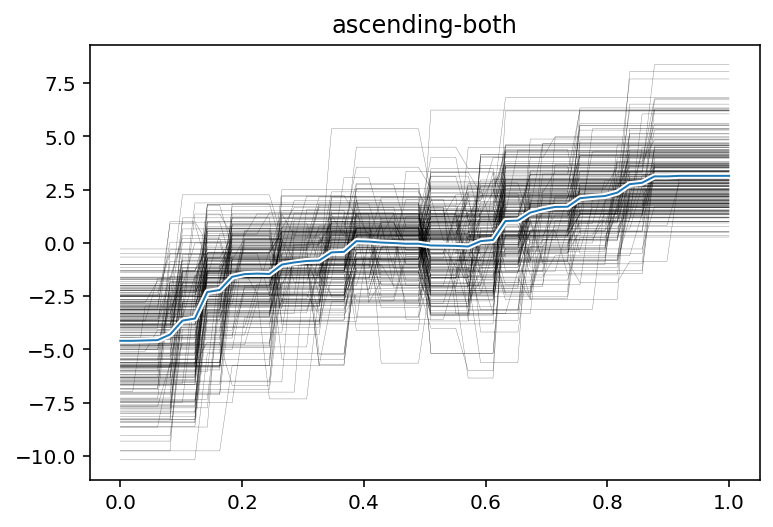

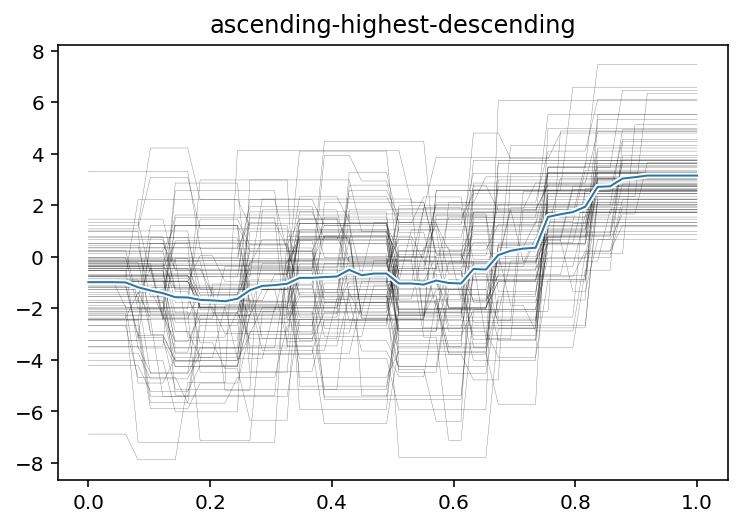

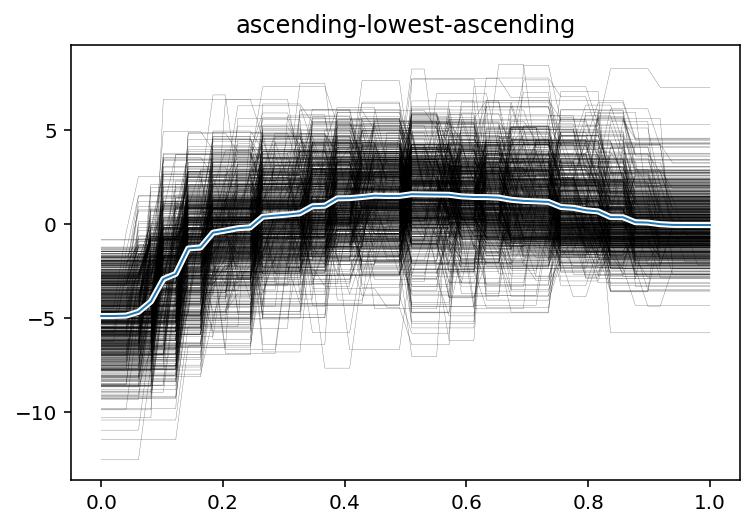

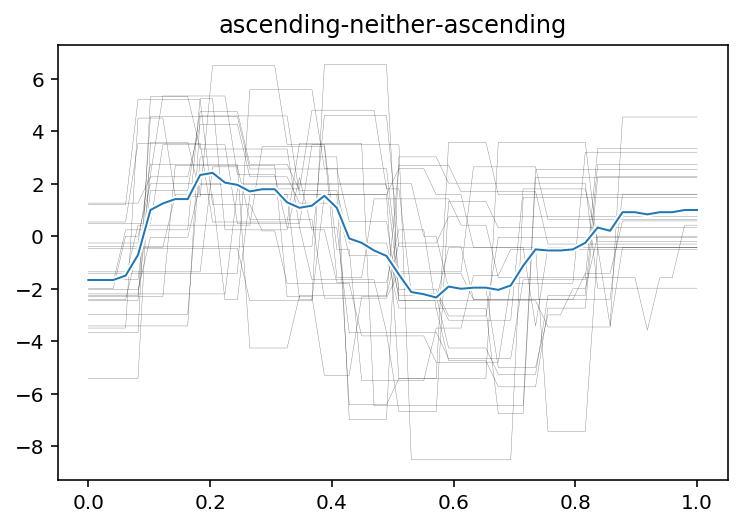

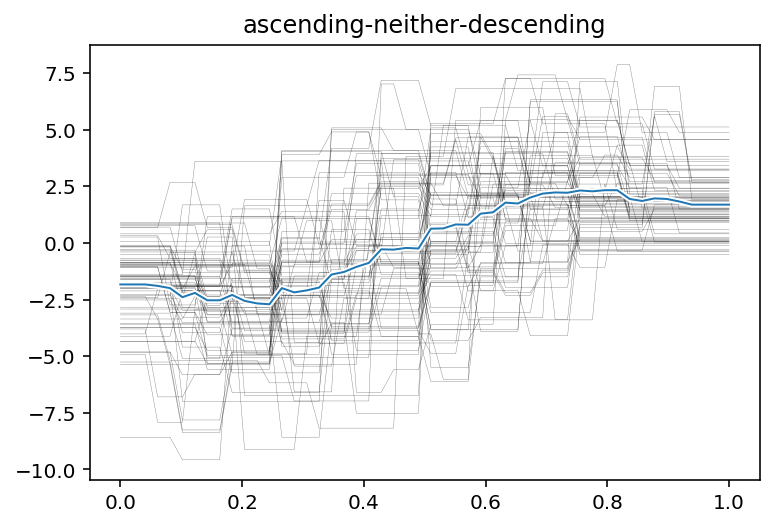

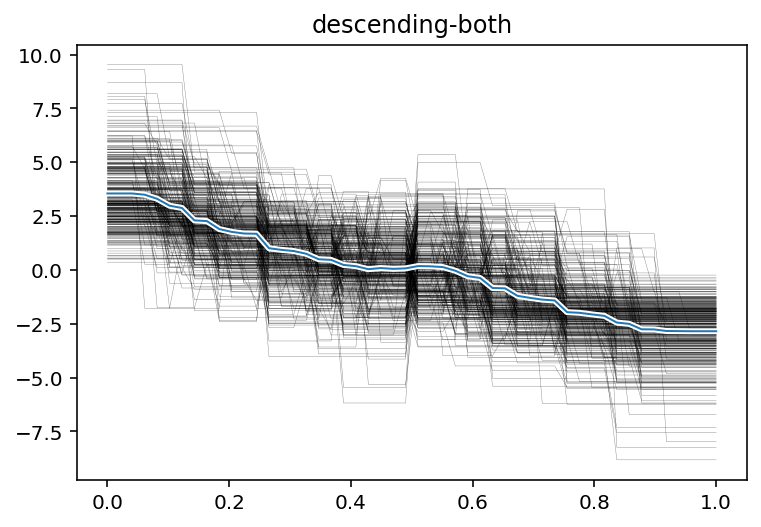

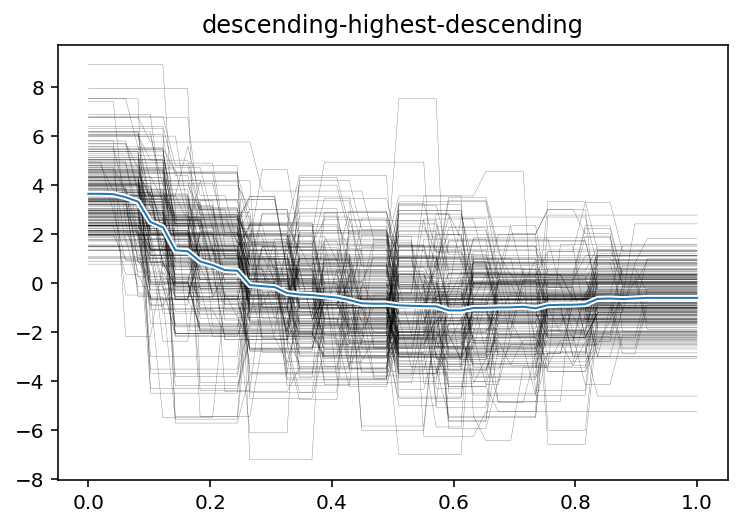

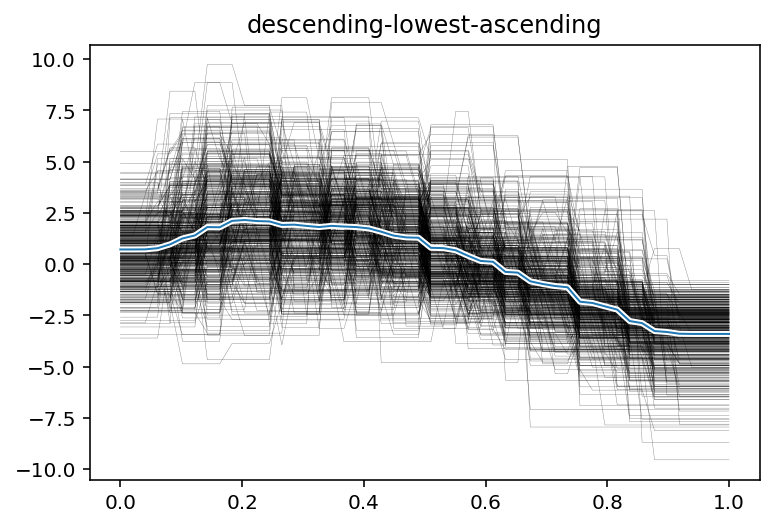

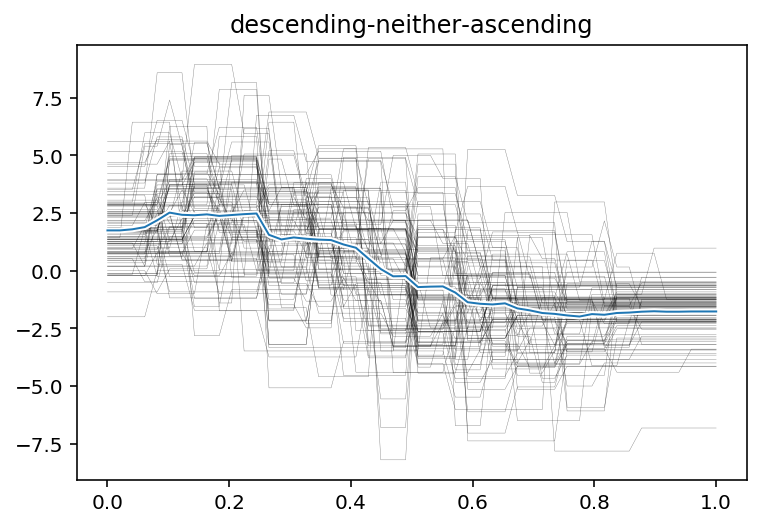

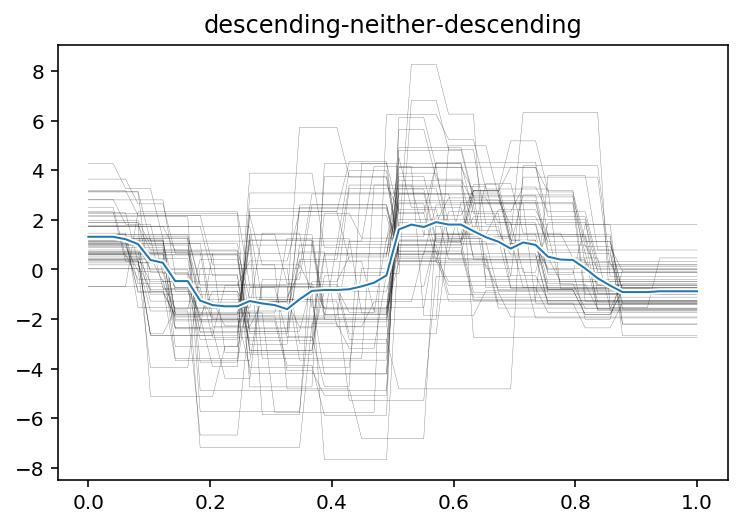

In [34]:
cont = contours['erk']
N=1000
for contour_type in np.unique(adams_types)[:10]:
    has_right_type = [t == contour_type for t in adams_types]
    subset = cont[has_right_type]
    
    plt.figure()
    xs = np.linspace(0, 1, cont.shape[1])
    plt.plot(xs, subset.mean(axis=0), lw=3, c='w', zorder=1)
    plt.plot(xs, subset.mean(axis=0), lw=1, zorder=2)
    plt.plot(xs, subset[:N,:].T, '-', color='k', lw=0.2, alpha=.5, zorder=-1);
    plt.title(contour_type)

In [43]:
contour_type = 'ascending-both-ascending'
cont = contours['erk']
has_right_type = [t == contour_type for t in adams_types]
subset = cont[has_right_type]

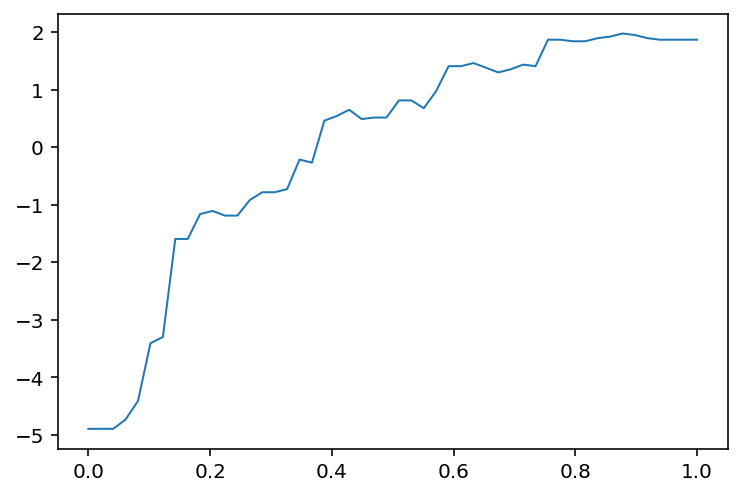

In [46]:
xs = np.linspace(0, 1, cont.shape[1])
plt.plot(xs, subset.mean(axis=0), lw=1.6, c='w', zorder=1)
plt.plot(xs, subset.mean(axis=0), lw=1, zorder=2)